In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
df = pd.read_csv("../data/train.csv")

In [96]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [97]:
dfnew = df.iloc[:, 41:61]

In [98]:
dfnew.columns

Index(['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish'],
      dtype='object')

In [133]:
dfnew.dtypes

CentralAir      object
Electrical      object
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
KitchenQual     object
TotRmsAbvGrd     int64
Functional      object
Fireplaces       int64
FireplaceQu     object
GarageType      object
GarageYrBlt     object
GarageFinish    object
dtype: object

In [99]:
dfnew.isna().any(axis=0)

CentralAir      False
Electrical       True
1stFlrSF        False
2ndFlrSF        False
LowQualFinSF    False
GrLivArea       False
BsmtFullBath    False
BsmtHalfBath    False
FullBath        False
HalfBath        False
BedroomAbvGr    False
KitchenAbvGr    False
KitchenQual     False
TotRmsAbvGrd    False
Functional      False
Fireplaces      False
FireplaceQu      True
GarageType       True
GarageYrBlt      True
GarageFinish     True
dtype: bool

## Missingness

In [100]:
missingcols = dfnew.columns[dfnew.isna().any()]
missingcols

Index(['Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish'],
      dtype='object')

In [101]:
# of missingness per column
for i in missingcols:
    print(i, len(dfnew[i].loc[dfnew[i].isna()]))


Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81


In [102]:
dfnew[dfnew["Electrical"].isna()]

CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
1379          Y        NaN       754       640             0       1394   

      BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1379             0             0         2         1             3   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
1379             1          Gd             7        Typ           0   

     FireplaceQu GarageType  GarageYrBlt GarageFinish  
1379         NaN    BuiltIn       2007.0          Fin

In [103]:
dfnew["Electrical"].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [104]:
for i in dfnew.columns:
    print(i, dfnew[i].unique(), "\n")

CentralAir ['Y' 'N'] 

Electrical ['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan] 

1stFlrSF [ 856 1262  920  961 1145  796 1694 1107 1022 1077 1040 1182  912 1494
 1253  854 1004 1296 1114 1339 1158 1108 1795 1060 1600  900 1704  520
  649 1228 1234 1700 1561 1132 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 1518 1656  736  955  794  816 1842 1360 1425  983  860 1426
  780  581 1370  902 1143 2207 1479  747 1304 2223  845  885 1086  840
  526  952 1072 1768  682 1337 1563 1065  804 1301  684  612 1013  990
 1235  964 1260  905  680 1588  960  835 1225 1610  977 1535 1226 1053
 1047  789  997 1844 1216  774 1282 2259 1436  729 1092 1125 1699  728
  988  772 1080 1199 1586  958  660 1327 1721 1682 1214 1959  928  864
 1734  910 1501 1728  970  875  896  969 1710 1252 1200  572  991 1392
 1232 1572 1541  882 1149  808 1867 1707 1064 1362 1651 2158 1164 2234
  968  769  901 1340  936 1217 1224 1593 1549  725 1431  855 1726  929
 1713 1121 1279  865  848  720 1442 1696 1100 1180 1212  93

FullBath [2 1 3 0] 

HalfBath [1 0 2] 

BedroomAbvGr [3 4 1 2 0 5 6 8] 

KitchenAbvGr [1 2 3 0] 

KitchenQual ['Gd' 'TA' 'Ex' 'Fa'] 

TotRmsAbvGrd [ 8  6  7  9  5 11  4 10 12  3  2 14] 

Functional ['Typ' 'Min1' 'Maj1' 'Min2' 'Mod' 'Maj2' 'Sev'] 

Fireplaces [0 1 2 3] 

FireplaceQu [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po'] 

GarageType ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types'] 

GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932. 1972. 1918. 1980. 1924.
 1996. 1940. 1949. 1994. 1910. 1978. 1982. 1992. 1925. 1941. 2010. 1927.
 1947. 1937. 1942. 1938. 1952. 1928. 1922. 1934. 1906. 1914. 1946. 1908.
 1929. 1933.

In [105]:
categorical = ["CentralAir","Electrical","BsmtFullBath","BsmtHalfBath","FullBath",
              "HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd",
              "Functional","Fireplaces","FireplaceQu","GarageType","GarageFinish"]
continuous = ["1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageYrBlt"]

In [106]:
#Assigning a value to the one NA observation in "Electrical" column
dfnew.loc[dfnew.Electrical.isna(), "Electrical"] = "SBrkr"

In [107]:
#Assigning a "None" value to NaN observations in the following columns
dfnew.loc[dfnew.FireplaceQu.isna(), "FireplaceQu"] = "None"
dfnew.loc[dfnew.GarageType.isna(), "GarageType"] = "None"
dfnew.loc[dfnew.GarageYrBlt.isna(), "GarageYrBlt"] = "None"
dfnew.loc[dfnew.GarageFinish.isna(), "GarageFinish"] = "None"

In [108]:
dfnew[dfnew["GarageYrBlt"].isna()].head()

Empty DataFrame
Columns: [CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish]
Index: []

In [109]:
#Making sure there are no more NA values
dfnew.columns[dfnew.isna().any()]

Index([], dtype='object')

In [114]:
categorical_df = dfnew[["CentralAir","Electrical","BsmtFullBath","BsmtHalfBath","FullBath",
              "HalfBath","BedroomAbvGr","KitchenAbvGr","KitchenQual","TotRmsAbvGrd",
              "Functional","Fireplaces","FireplaceQu","GarageType","GarageFinish"]]
continuous_df = dfnew[["1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageYrBlt"]]

## Dummify categorical variables

In [129]:
categorical_df = categorical_df.astype(object)

In [131]:
dummied_df = pd.get_dummies(categorical_df)
final_df = pd.concat([dummied_df, continuous_df], axis=1)
final_df.head()

CentralAir_N  CentralAir_Y  Electrical_FuseA  Electrical_FuseF  \
0             0             1                 0                 0   
1             0             1                 0                 0   
2             0             1                 0                 0   
3             0             1                 0                 0   
4             0             1                 0                 0   

   Electrical_FuseP  Electrical_Mix  Electrical_SBrkr  BsmtFullBath_0  \
0                 0               0                 1               0   
1                 0               0                 1               1   
2                 0               0                 1               0   
3                 0               0                 1               0   
4                 0               0                 1               0   

   BsmtFullBath_1  BsmtFullBath_2     ...       GarageType_None  \
0               1               0     ...                     0   
1               0               0     ...                     0   
2               1               0     ...                     0   
3               1               0     ...                     0   
4               1               0     ...                     0   

   GarageFinish_Fin  GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf  \
0                 0                  0                 1                 0   
1                 0                  0                 1                 0   
2                 0                  0                 1                 0   
3                 0                  0                 0                 1   
4                 0                  0                 1                 0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageYrBlt  
0       856       854             0       1710         2003  
1      1262         0             0       1262         1976  
2       920       866             0       1786         2001  
3       961       756             0       1717         1998  
4      1145      1053             0       2198         2000  

[5 rows x 82 columns]

In [134]:
final_df.to_pickle("./ray_pickle_df.pkl")

## Further Exploratory

In [132]:
dfnew.columns

Index(['CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027BEF04B550>,
      dtype=object)

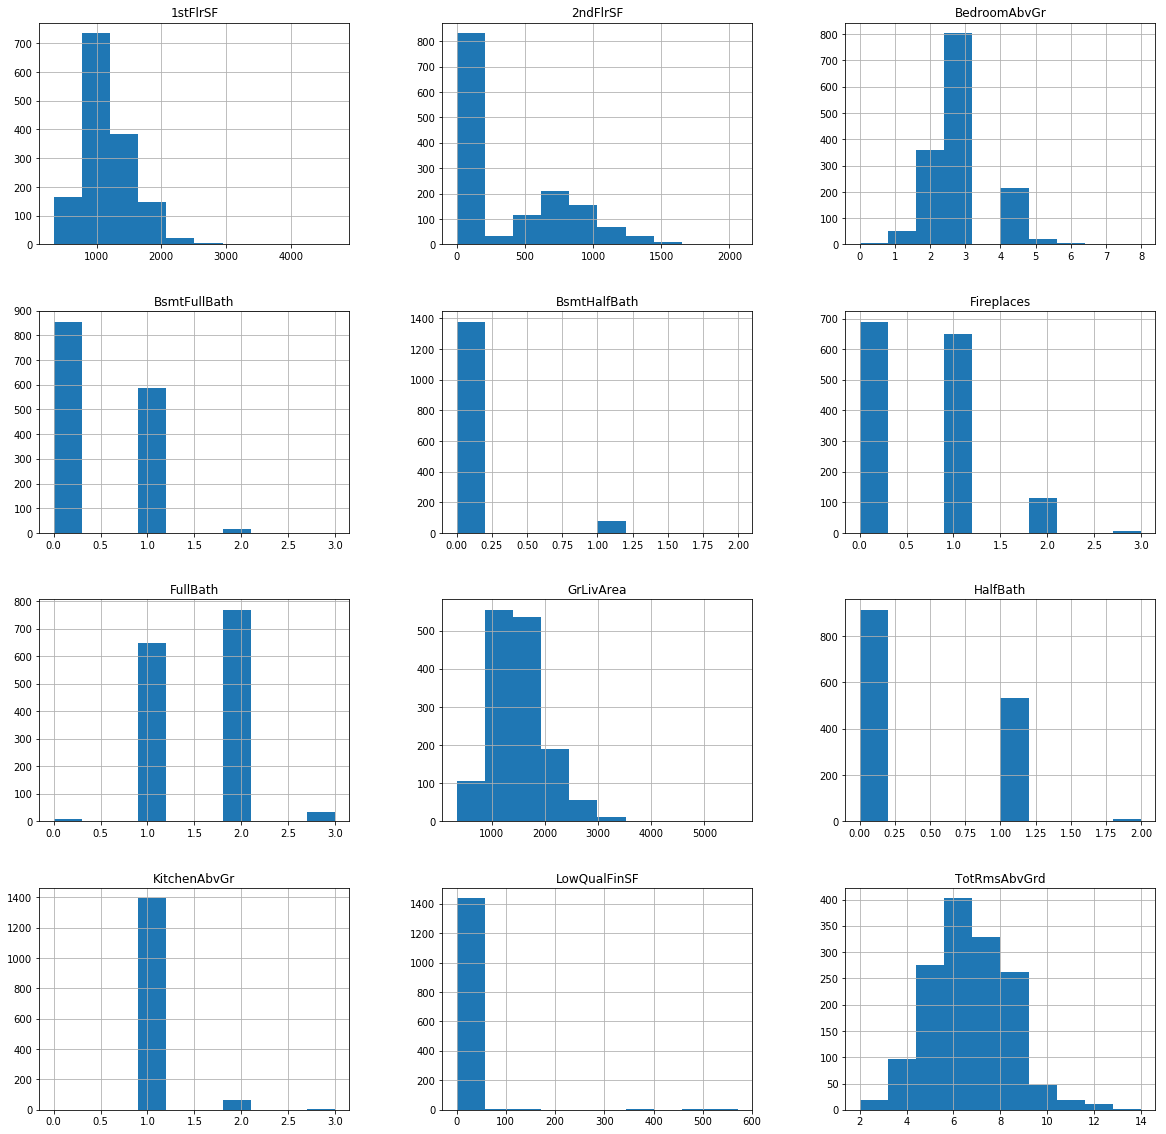

In [27]:
import matplotlib.pyplot as plt
dfnew.hist(figsize = (20,20))

In [93]:
final_df.columns[`]

Index(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'CentralAir_N',
       'CentralAir_Y', 'Electrical_FuseA', 'Electrical_FuseF',
       'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr',
       'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1',
       'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ',
       'FireplaceQu_Ex', 'FireplaceQu_Fa', 'FireplaceQu_Gd',
       'FireplaceQu_None', 'FireplaceQu_Po', 'FireplaceQu_TA',
       'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_None', 'GarageFinish_Fin', 'GarageFinish_None',
       'GarageFinish_RFn', 'GarageFinish_Unf', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalf